In [21]:
#import required libraries
#load Fashion_MNIST dataset
#Normalize the dataset
#Build a CNN model using Keras
#Train the model
#Evaluate the model
#Take new images input from users
#Preprocess the images
#Predict the class 

In [22]:
#Import Required Libraries --
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing import image # for image preprocessing
from PIL import Image # for image handling

In [23]:
#Load Fashion_MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [24]:
#shape
print( x_train.shape)
print( x_test.shape)
print( y_train.shape)
print( y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [25]:
#unique value
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [26]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [27]:
#Normalize the dataset
x_train = x_train / 255.0 #bring pixel values to the range [0, 1] 
x_test = x_test / 255.0 

In [28]:
np.unique(x_train)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [29]:
#reshape training data
x_train = x_train.reshape((-1, 28, 28, 1)) #batch_size, height, width, channels
#reshape testing data
x_test = x_test.reshape((-1, 28, 28, 1))
#batch_size = it is the number of samples processed before the model is updated
#channels = it is defined as the number of color channels in the image (1 for grayscale, 3 for RGB)
#we take batch_size as -1, which means it will be inferred from the data

In [30]:
#create a CNN model
#filter : it is the number of output channels in the convolutional layer
#kernel_size : it is the size of the filter applied to the input image
#activation : it is the activation function applied to the output of the convolutional layer
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)), #input_shape is the shape of the input image
    layers.MaxPooling2D((2, 2)), #pooling layer to reduce the spatial dimensions
    layers.Conv2D(64, (3, 3), activation='relu'), #second convolutional layer
    layers.MaxPooling2D((2, 2)), #second pooling layer
    layers.Conv2D(128, (3, 3), activation='relu'), #third convolutional layer
    layers.Flatten(), #flatten the output of the convolutional layers
    layers.Dense(128, activation='relu'), #fully connected layer
    layers.Dense(10, activation='softmax') #output layer with 10 classes for Fashion MNIST
])

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
#compile the model
model.compile(
    optimizer='adam', #optimizer to use for training
    loss='sparse_categorical_crossentropy', #loss function for multi-class classification
    metrics=['accuracy'] #metrics to evaluate the model
)

In [54]:
#train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9892 - loss: 0.0331
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9901 - loss: 0.0287
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9900 - loss: 0.0277
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9909 - loss: 0.0257
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9910 - loss: 0.0270


In [55]:
#Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9055 - loss: 0.7631
Test Loss: 0.7387503981590271, Test Accuracy: 0.9068999886512756


In [62]:
#Take new images from users
#output class
output = ['Shirt' , 'Pant', 'T-shirt' , 'Trouser' , 'bag' , 'belt' , 'shoes' , 'watch' , 'coat' , 'cap']



In [65]:
#take new images input from users
def image(images):
    a = Image.open(images).convert('L').resize((28, 28)) #convert to grayscale and reshape
    a_array = np.array(a)
    
    a_in = 255 - a_array #invert the pixel values
    a_in = a_in / 255.0 #normalize the pixel values
    a_in = a_in.reshape((1, 28, 28, 1)) #reshape to match the input shape of the model
    pre = model.predict(a_in) #predict the class
    pre_class = output[np.argmax(pre)] #get the class name
    
    plt.imshow(a_in.reshape(28,28), cmap='gray') #display the image
    plt.title(pre_class) #display the predicted class
    plt.axis('off') #hide the axes
    plt.show() #show the image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


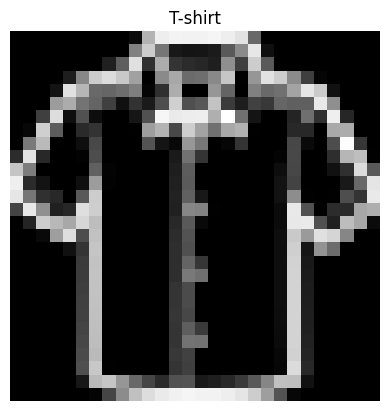

In [68]:
image ("C:\\Users\\hp\\Desktop\\Gen AI\\shirt.png")